In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
# Load data
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [4]:
print("Dataset shape:", train_df.shape)
print("\nMissing values:\n", train_df.isnull().sum())
print("\nData types:\n", train_df.dtypes)
print("\nBasic statistics:\n", train_df.describe())

Dataset shape: (1460, 81)

Missing values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Data types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Basic statistics:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000  

Text(0.5, 1.0, 'Distribution of Sale Price')

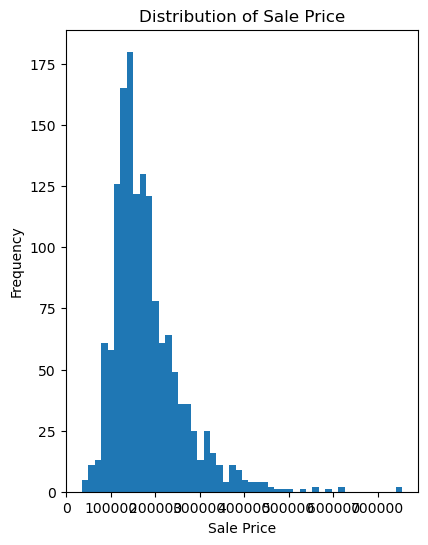

In [5]:
# Target variable analysis
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(train_df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

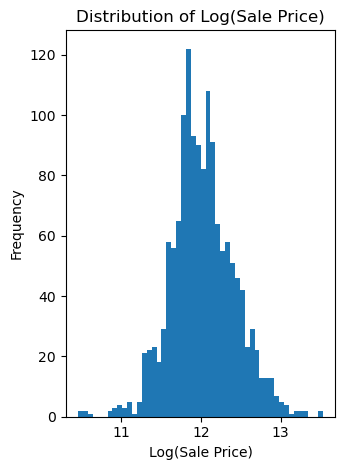

In [6]:
plt.subplot(1, 2, 2)
plt.hist(np.log1p(train_df['SalePrice']), bins=50)
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Sale Price)')
plt.tight_layout()
plt.savefig('../docs/saleprice_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# Feature correlations
numerical_features = train_df.select_dtypes(include=[np.number]).columns
correlation_matrix = train_df[numerical_features].corr()

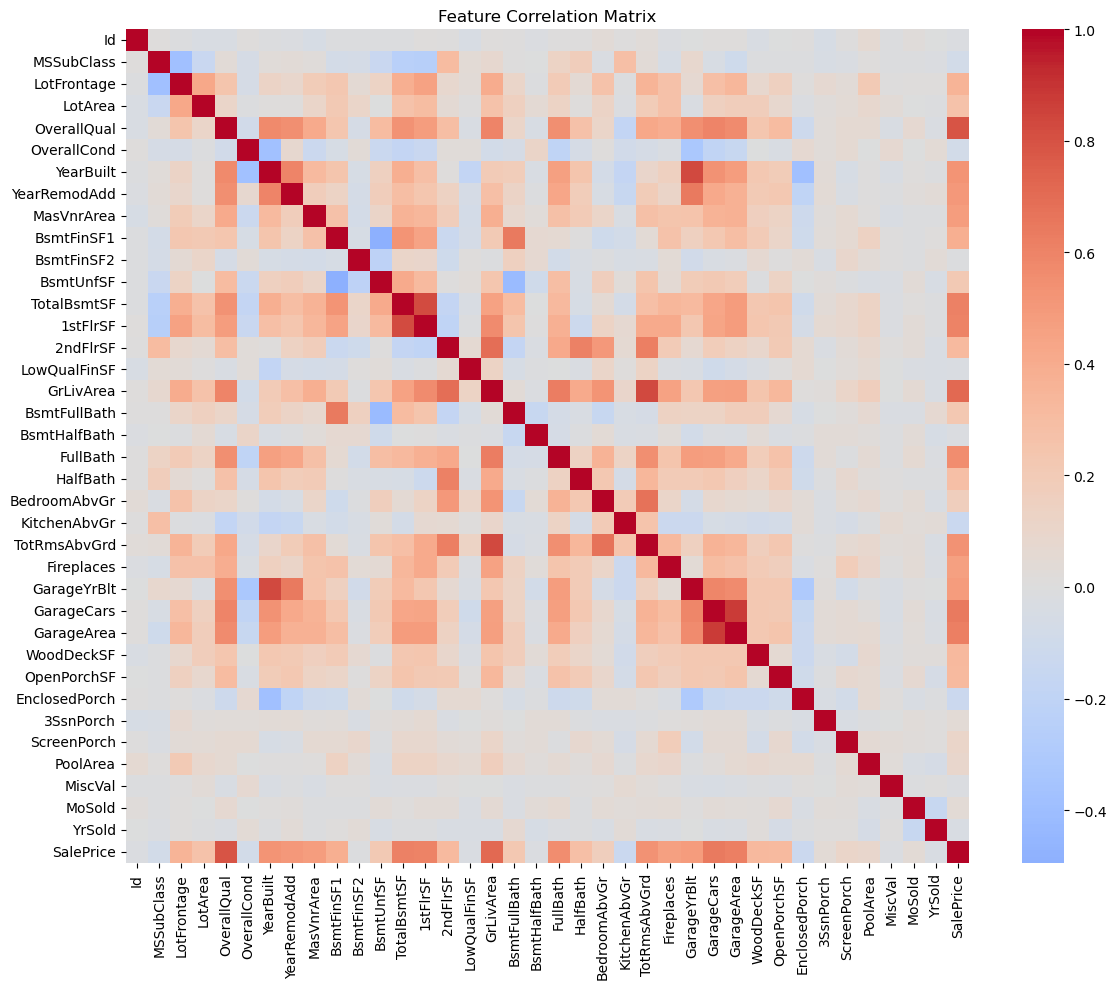

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../docs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Top correlated features with target
saleprice_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("\nTop 15 features correlated with SalePrice:\n", saleprice_corr.head(16))


Top 15 features correlated with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
Name: SalePrice, dtype: float64


In [10]:
# Missing value analysis
missing_data = pd.DataFrame({
    'missing_count': train_df.isnull().sum(),
    'percentage': (train_df.isnull().sum() / len(train_df)) * 100
})
missing_data = missing_data[missing_data['missing_count'] > 0].sort_values(by='missing_count', ascending=False)
print("\nMissing Data:\n", missing_data)


Missing Data:
               missing_count  percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtFinType2             38    2.602740
BsmtExposure             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493
